# Titanic dataset a analysis

On this notebook we will use seaborn to look around the data and get some future helpful insights to get a better score on the titanic predictions. Than we will use a Linear Regression model from skleran to se how good our model peform. 

When you don't undestand the code you can look around for some coments about them

In [353]:
#some basics imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [354]:
#reading the training dataset
train = pd.read_csv('titanic_train.csv')

In [355]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [356]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Look into the data is necessary to get informations about what we have. First of all lets look the missing data of this titanic dataframe 

In [357]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


using seaborn to visualisy the missing data

<AxesSubplot:>

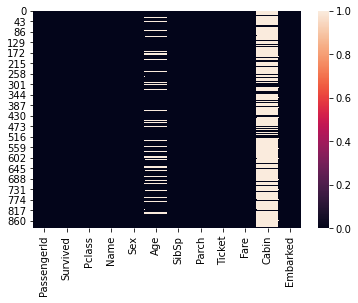

In [358]:
sns.heatmap(train.isnull())

or do it a way better

<AxesSubplot:>

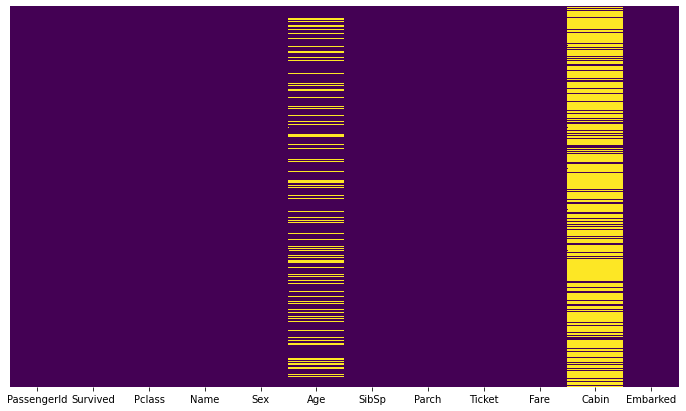

In [359]:
plt.figure(figsize=(12, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation

we see the age and cabin have some missing information but how much of this is information is missing

In [360]:
nullOnAge = train["Age"].isnull().sum()
nullOnAge

177

In [361]:
nullOnAge/(len(train["Age"]))

0.19865319865319866

about 20% of the Age data is missing

Now lets look around the cabin missing data

In [12]:
nullOnCabin = train["Cabin"].isnull().sum()
nullOnCabin

687

In [13]:
nullOnCabin/len(train["Cabin"])

0.7710437710437711

77% of data is missing on the Cabin collum

its possible to use the age if we complete the missing anwsers. One strategy is to use the Pclass columns who has the pasxsanger class information to use the mean of each one of them to replace the missing age. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

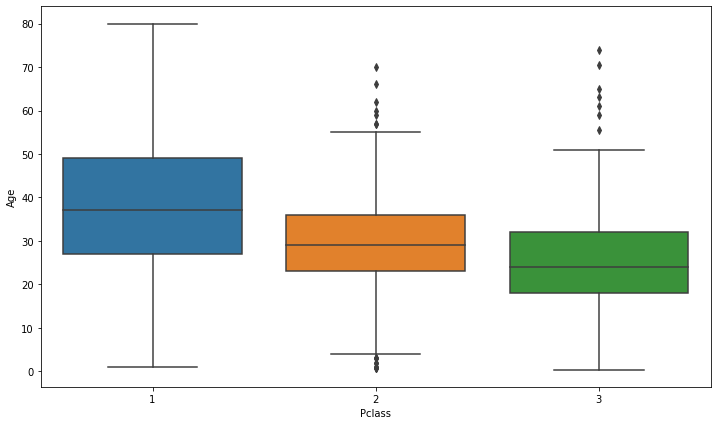

In [45]:

plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=train)

### before it let give a look at the suvivers

from this dataset the major of people there died

<AxesSubplot:xlabel='Survived', ylabel='count'>

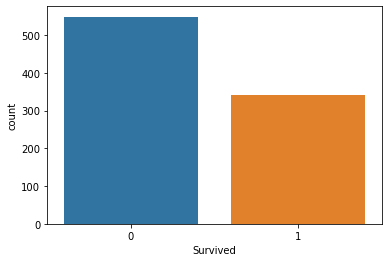

In [20]:
sns.countplot(x="Survived",data=train)

looking the plot below the major of the ones who died was the men while 2/3 of women lived. Let check out what was this exactly number it can helps in the future analysis

<AxesSubplot:xlabel='Survived', ylabel='count'>

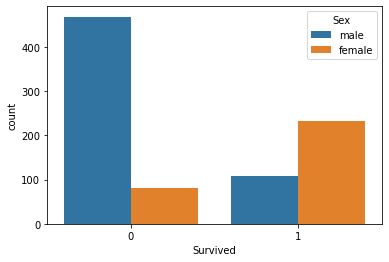

In [21]:
sns.countplot(x="Survived",data=train,hue='Sex')

In [36]:
totalman=(train["Sex"] == "male").sum()
manSurvived=((train["Survived"]== 1)&(train["Sex"] == "male")).sum()

In [35]:
per_manSurvived=manSurvived/totalman
per_manSurvived

# 18,9% of the man survived

0.18890814558058924

In [38]:
totalwoman=(train["Sex"] == "female").sum()
womanSurvived=((train["Survived"]== 1)&(train["Sex"] == "female")).sum()

In [40]:
per_womanSurvived=womanSurvived/totalwoman
per_womanSurvived

#74% of the woman on titanic survived

0.7420382165605095

<AxesSubplot:xlabel='Survived', ylabel='count'>

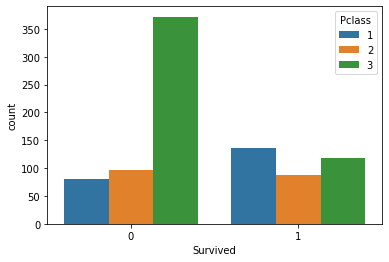

In [50]:
sns.countplot(x="Survived",data=train,hue='Pclass')

Giving a look at the age

<AxesSubplot:>

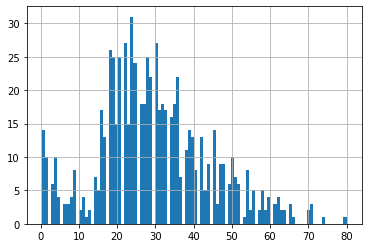

In [54]:
train['Age'].hist(bins=100)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

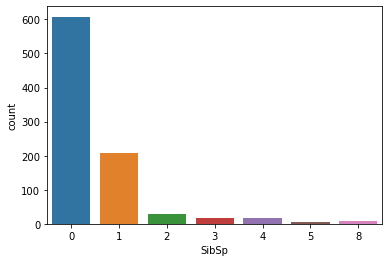

In [3]:
sns.countplot(x='SibSp',data=train)

# Data manipulation

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

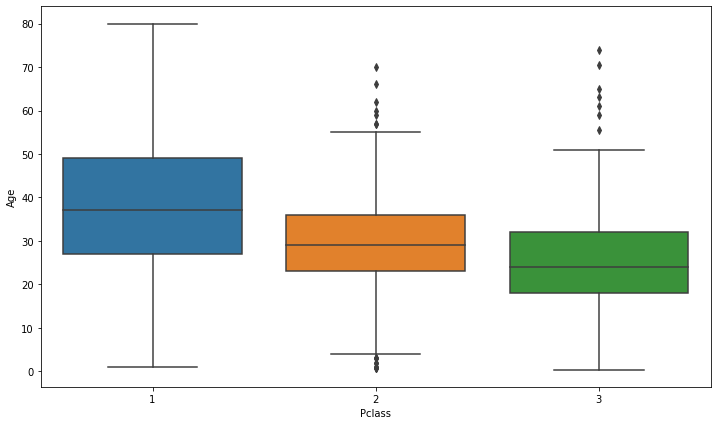

In [362]:

plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=train)

In [4]:
# this function will replace the null age number for the mean of pclass if the passenger is from
#first class he will return 38 years as we can see in the up figure that is the mean of fisrt class age;

def colocar_idade (cols):
    Idade = cols[0]
    Classe = cols[1]
    
    if pd.isnull(Idade):
        if Classe == 1:
            return 38
        elif Classe == 2:
            return 30
        else:
            return 25
    else:
        return Idade 
        

In [5]:
#calling the function using apply, very useful
train["Age"] = train[["Age","Pclass"]].apply(colocar_idade,axis=1) 


<AxesSubplot:>

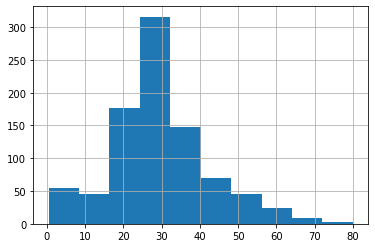

In [6]:
train["Age"].hist()

After we use the pclass age mean to input on the missing ages of the dataframe lets check how it looks and see what else can be done to clean the data 

<AxesSubplot:>

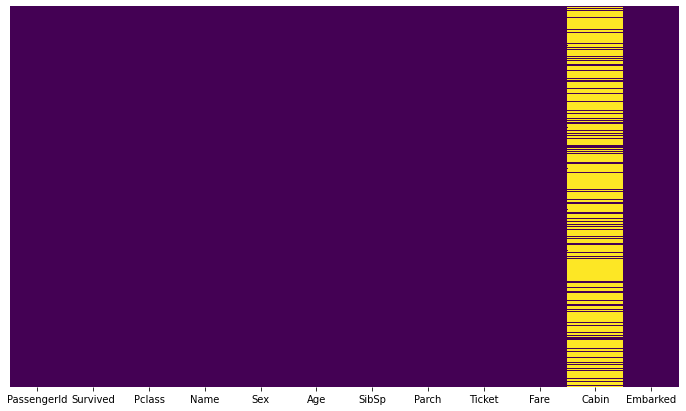

In [7]:
plt.figure(figsize=(12, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation

In [8]:
#just del the column that we cant work with
del train["Cabin"]

<AxesSubplot:>

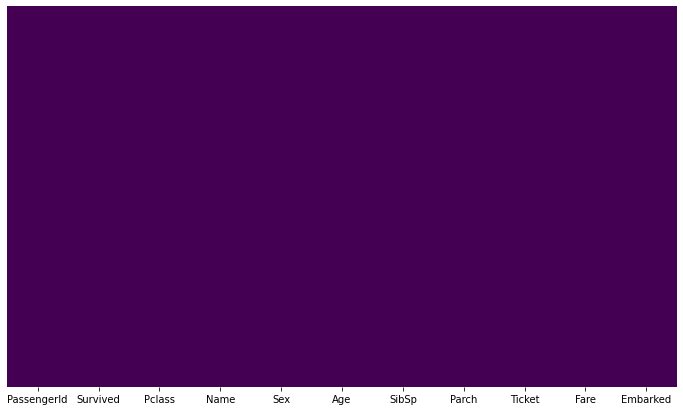

In [9]:
plt.figure(figsize=(12, 7))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation

get dummies is useful to discretize the categorical variables transforming them in zeros and ones we need to do it to sex and Embarked

In [11]:
Sex=pd.get_dummies(train["Sex"],drop_first=True)

In [12]:
Embark=pd.get_dummies(train["Embarked"],drop_first=True)

In [13]:
train.drop(['Sex', 'PassengerId', 'Name', 'Ticket',"Embarked"],axis=1, inplace = True)

In [14]:
train = pd.concat([train,Sex,Embark], axis= 1)

In [178]:
train.rename(columns ={"male":"Sex"},inplace=True)

In resume what we did was transforme the dataset trow numbers representation, notice that now the dataset shows the Sex in a binary situation where the male is represented by the number 1 and the female by the number 0 the same logic goes to the embarked columns that had 3 representations C Q S notice that we dont need tree columns to represent them just the Q and S because when we want to represent the letter C embark we can do it by zeroly(if this word don't exist it should) Q and S. now lets train the linear regression model and see the results.

In [18]:
from sklearn.linear_model import LogisticRegression

In [349]:
from sklearn.model_selection import train_test_split

use train_test_split to test the train dataset look close the code below

In [23]:
X_train, X_test,y_train,y_test = train_test_split(train.drop("Survived",axis=1),train["Survived"],test_size=0.3)

In [28]:
logmodel =LogisticRegression()

In [31]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
predict = logmodel.predict(X_test)
len(predict)

268

In [40]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       177
           1       0.72      0.70      0.71        91

    accuracy                           0.81       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.80      0.81      0.81       268



with the model completed with a sucessful rate lets train with all the train dataset. W will get the test dataset and see how our code will perfome there to submit to kaggle

In [304]:
test = pd.read_csv("titanic_test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<AxesSubplot:>

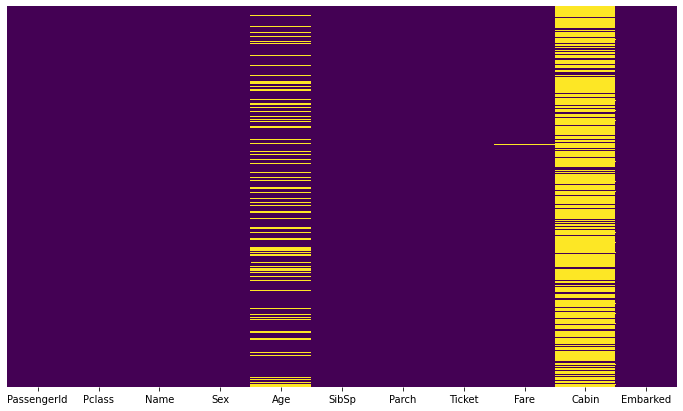

In [305]:
plt.figure(figsize=(12, 7))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation

lets use the code we use before to replace the Age with the mean of Pclass and exclude the null Fare line

In [306]:
test["Age"] = test[["Age","Pclass"]].apply(colocar_idade,axis=1) 

<AxesSubplot:>

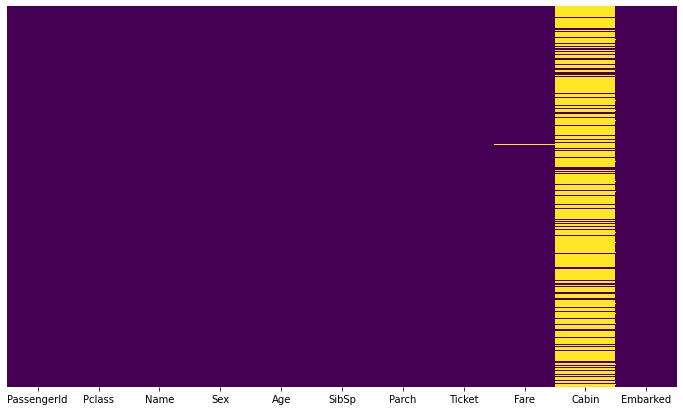

In [307]:
plt.figure(figsize=(12, 7))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation


In [308]:
test.drop(["Cabin"],axis=1,inplace=True)

we notice that the columns fare has only one Nan. To use this dataframe on titanic anwser we need all those lines to send the right awnser if we just del the line the answer will be wrong and very hard to fill

In [318]:
#serach the Nan line and input the mean of Fare
test[test["Fare"].isna()] = test[test["Fare"].isna()].fillna(test["Fare"].mean())

In [317]:
test["Fare"].mean()

35.6271884892086

<AxesSubplot:>

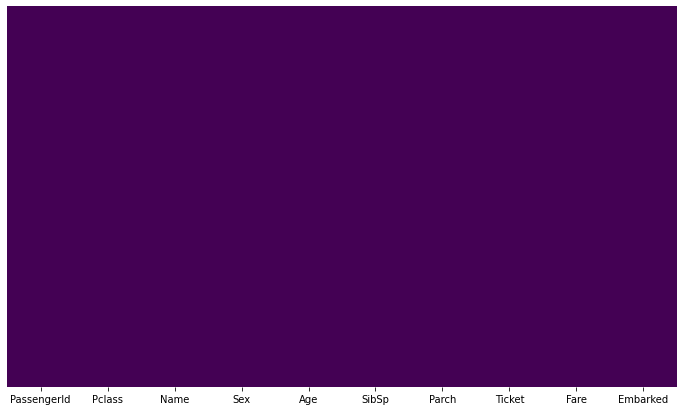

In [319]:
plt.figure(figsize=(12, 7))
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis') #cbar false to binary situation


In [321]:
Sex= pd.get_dummies(test["Sex"],drop_first=1)

In [322]:
Embark= pd.get_dummies(test["Embarked"],drop_first=1)


In [323]:
test.drop(["PassengerId","Sex","Name","Ticket","Embarked"],axis=1,inplace=True)

In [324]:

test=pd.concat([test,Sex,Embark],axis=1)
test


,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,25.0,0,0,8.0500,1,0,1


In [325]:
test.rename(columns ={"male":"Sex"},inplace=True)

In [326]:
X_train = train.drop("Survived",axis=1)
y_train = train["Survived"]

,Pclass,Age,SibSp,Parch,Fare,Sex,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,25.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,25.0,0,0,8.0500,1,0,1


In [327]:
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [328]:
prediction = logmodel.predict(test)


In [330]:
testID = pd.read_csv("titanic_test.csv")

In [331]:
testID.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [343]:
#good way to output the result exactly how kaggle wants

sub = pd.Series(prediction, index=testID["PassengerId"],name = "Survived")

In [346]:
sub.to_csv("model_LR.csv",header=True)